# Avanços e Desafios das IAs Generativas: Uma Revisão Bibliométrica sobre seus Impactos.
## UMA REVISÃO BIBLIOMÉTRICA.

resumo - Este estudo apresenta uma análise do panorama das pesquisas científicas sobre inteligências
artificiais generativas (IAGs) e na forma como a comunidade acadêmica tem abordado seus impactos na
sociedade. Utilizando uma revisão bibliométrica e análise de dados baseada em uma busca sistemática
nas principais bases acadêmicas, o estudo mapeia o volume de publicações, os temas de maior inte-
resse, os impactos no meio acadêmico, além das principais instituições e autores que contribuem para a
área. Os resultados fornecem uma síntese estruturada das publicações sobre IAGs, servindo como um
recurso para a identificação de referências qualificadas e tendências emergentes no campo.
Palavras-chave: inteligência artificial generativa, impacto, busca sistemática, pesquisa.

**Palavras-chave**: inteligência artificial generativa, impacto, busca sistemática, pesquisa.

## Metodologia adotada:
Para atingir o objetivo de construir uma base bibliográfica sólida e confiável, este estudo inicia-se com uma pesquisa exploratória, baseada na consulta a referenciais teóricos e documentais, conforme apresentado na introdução. Além disso, adota-se uma abordagem quantitativa e qualitativa sobre o tratamento ds bases de dados de artigos, conforme descrito por Medeiros et al. (2010) e Gil (2002), utilizando metodologia bibliométrica para a análise de dados provenientes das bases de publicações científicas Web of Science, Scopus e IEEE.


### Análise de ciência de dados

No levantamento de dados para esta pesquisa, aplicou-se um filtro para a seleção de publica-
ções nas bases de indexação, considerando os termos "Generative Artificial Intelligence"ou "Artificial
Intelligence", em conjunto com "Impact". A Tabela 1 apresenta as buscas realizadas em cada base e o
número de resultados obtidos.

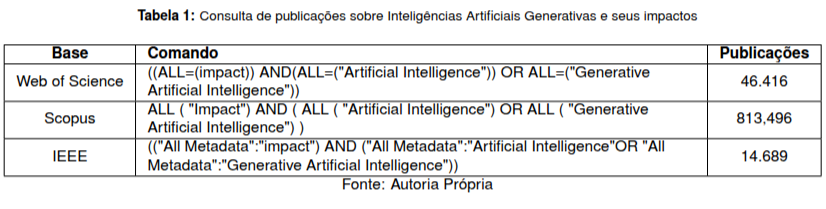


Embora a base Scopus apresente um volume maior de publicações, as três bases de dados selecionadas possuem um número representativo de registros para análise. Além disso, considerando as limitações das interfaces de cada sistema, a exportação de dados foi realizada respeitando o limite padrão de 1.000 registros por base, indexados por relevância, garantindo assim uma amostra significativa para a pesquisa.

Como resultado desta fase de aquisição dos dados, 3 arquivos foram gerados:


*   Base Web of Science: "WOS_1000_relevância_Impact.xlsx"
*   Base Scopus: "scopus_1000_relevância_Impact.csv"
*   Base IEEE: "IEEE_1000_relevância_Impact.csv"



In [1]:
# Bibliotecas importantes
import pandas as pd             #Biblioteca para importação e tratamento dos dados: DataFrames
import numpy as np              #Biblioteca básica matemática que será utilizada neste artigo para cálculos estatísticos
import matplotlib.pyplot as plt #Biblioteca para motagem de gráficos
import seaborn as sns           #Biblioteca para montagem de gráficos
import difflib                  #Biblioteca específica para tratamento e comparação de strings
import random as r
from scipy import stats
from wordcloud import WordCloud

In [2]:
# Biblioteca construída para colocar labels de valores nos gráficos (MatplotLib)
def autolabel(grupos):
   for i in grupos:
      h = i.get_height()
      ax.annotate('{}'.format(h),
                  xy=(i.get_x() + i.get_width() / 2, h),
                  xytext=(0, 3),
                  textcoords="offset points",
                  fontsize=7,
                  ha='center', va='bottom')

### Aquisição dos dados das bases
Leitura dos dados dos 3 arquivos mencionados anteriormente:

In [3]:
# Variáveis que podem ser utilizadas para determinar o tamanho das amostras: (Valor Máx: 1000)
qtd_artigos_wos = 1000
qtd_artigos_scopus = 1000
qtd_artigos_ieee = 1000

Leitura da base Web of Science: (arquivo: WOS_1000_relevância_Impact.xlsx)

In [4]:
# Carregando as bases de dados da Web of Science
df_wos_bruto = pd.read_excel('../Base_dados/WOS_1000_relevancia_Impact.xlsx')
df_wos_bruto = df_wos_bruto[:qtd_artigos_wos]
df_wos_publicacoes_por_ano = pd.DataFrame(df_wos_bruto.groupby('Publication Year').count()['Article Title'])
df_wos_publicacoes_por_ano.reset_index(inplace=True)
df_wos_publicacoes_por_ano.rename(columns={'Publication Year':'Ano', 'Article Title': 'Quantidade'}, inplace=True)
print('Quantidade de publicações por ano (Base Web of Science):')
print(df_wos_publicacoes_por_ano)
print('\nQuantidade de publicações: ',df_wos_publicacoes_por_ano['Quantidade'].sum())
print('\nColunas (Metadados da base Web of Science):')
print(df_wos_bruto.columns)

Quantidade de publicações por ano (Base Web of Science):
     Ano  Quantidade
0   1991           1
1   1992           1
2   1993           2
3   2000           1
4   2006           1
5   2012           1
6   2014           1
7   2015           5
8   2016           4
9   2017          10
10  2018          17
11  2019          53
12  2020          80
13  2021         129
14  2022         142
15  2023         170
16  2024         354
17  2025          28

Quantidade de publicações:  1000

Colunas (Metadados da base Web of Science):
Index(['Publication Type', 'Authors', 'Book Authors', 'Book Editors',
       'Book Group Authors', 'Author Full Names', 'Book Author Full Names',
       'Group Authors', 'Article Title', 'Source Title', 'Book Series Title',
       'Book Series Subtitle', 'Language', 'Document Type', 'Conference Title',
       'Conference Date', 'Conference Location', 'Conference Sponsor',
       'Conference Host', 'Author Keywords', 'Keywords Plus', 'Abstract',
       'Addresse

Leitura da base Scopus: (Arquivo: scopus_1000_relevância_Impact.csv)

In [5]:
# Carregando as bases de dados da Scopus
df_scopus_bruto = pd.read_csv('../Base_dados/scopus_1000_relevancia_Impact.csv')
df_scopus_bruto = df_scopus_bruto[:qtd_artigos_scopus]
df_scopus_publicacoes_por_ano = pd.DataFrame(df_scopus_bruto.groupby('Year').count()['Title'])
df_scopus_publicacoes_por_ano.reset_index(inplace=True)
df_scopus_publicacoes_por_ano.rename(columns={'Year':'Ano', 'Title': 'Quantidade'}, inplace=True)
print('Quantidade de publicações por ano (Base Scopus):')
print(df_scopus_publicacoes_por_ano)
print('\nQuantidade de publicações:', df_scopus_publicacoes_por_ano['Quantidade'].sum())
print('\nColunas (Metadados da base Scopus):')
print(df_scopus_bruto.columns)

Quantidade de publicações por ano (Base Scopus):
    Ano  Quantidade
0  2023         148
1  2024         773
2  2025          79

Quantidade de publicações: 1000

Colunas (Metadados da base Scopus):
Index(['Authors', 'Author full names', 'Author(s) ID', 'Title', 'Year',
       'Source title', 'Volume', 'Issue', 'Art. No.', 'Page start', 'Page end',
       'Page count', 'Cited by', 'DOI', 'Link', 'Abstract', 'Author Keywords',
       'Index Keywords', 'Document Type', 'Publication Stage', 'Open Access',
       'Source', 'EID'],
      dtype='object')


Leitura da base IEEE: (Arquivo: IEEE_1000_relevância_Impact.csv)

In [6]:
# Carregando as bases de dados da IEEE
df_ieee_bruto = pd.read_csv('../Base_dados/IEEE_1000_relevancia_Impact.csv')
df_ieee_bruto = df_ieee_bruto[:qtd_artigos_ieee]
df_ieee_publicacoes_por_ano = pd.DataFrame(df_ieee_bruto.groupby('Publication Year').count()['Document Title'])
df_ieee_publicacoes_por_ano.reset_index(inplace=True)
df_ieee_publicacoes_por_ano.rename(columns={'Publication Year':'Ano', 'Document Title': 'Quantidade'}, inplace=True)
print('Quantidade de publicações por ano (Base IEEE):')
print(df_ieee_publicacoes_por_ano)
print('\nQuantidade de publicações:', df_ieee_publicacoes_por_ano['Quantidade'].sum())
print('\nColunas (Metadados da base IEEE):')
print(df_ieee_bruto.columns)

Quantidade de publicações por ano (Base IEEE):
     Ano  Quantidade
0   2001           1
1   2006           1
2   2009           1
3   2011           2
4   2013           5
5   2014           1
6   2015           4
7   2016           5
8   2017           7
9   2018          14
10  2019          38
11  2020          68
12  2021          88
13  2022         100
14  2023         277
15  2024         386
16  2025           1

Quantidade de publicações: 999

Colunas (Metadados da base IEEE):
Index(['Document Title', 'Authors', 'Author Affiliations', 'Publication Title',
       'Date Added To Xplore', 'Publication Year', 'Volume', 'Issue',
       'Start Page', 'End Page', 'Abstract', 'ISSN', 'ISBNs', 'DOI',
       'Funding Information', 'PDF Link', 'Author Keywords', 'IEEE Terms',
       'Mesh_Terms', 'Article Citation Count', 'Patent Citation Count',
       'Reference Count', 'License', 'Online Date', 'Issue Date',
       'Meeting Date', 'Publisher', 'Document Identifier'],
      dtype='obj

Análise gráfica das publicações nas três bases (Web of Science, Scopus, IEEE)

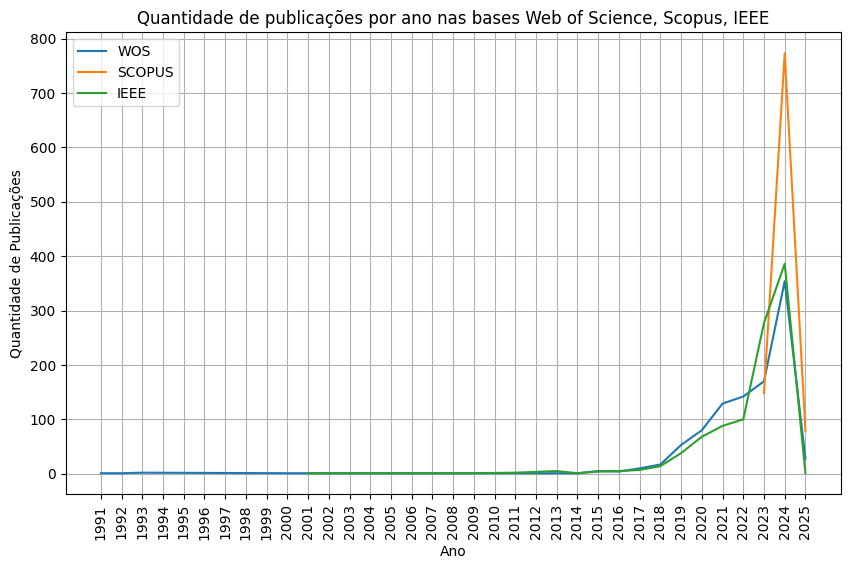

In [7]:
# Montando o gráfico das publicações por ano
lista_anos = [df_wos_publicacoes_por_ano['Ano'], df_scopus_publicacoes_por_ano['Ano'], df_ieee_publicacoes_por_ano['Ano']]
lista_anos = lista_anos[0].tolist() + lista_anos[1].tolist() + lista_anos[2].tolist()
lista_anos = [ano for ano in range(min(lista_anos), max(lista_anos)+1)]
figure, ax = plt.subplots(figsize=(10,6))
ax.plot(df_wos_publicacoes_por_ano['Ano'], df_wos_publicacoes_por_ano['Quantidade'], label='WOS')
ax.plot(df_scopus_publicacoes_por_ano['Ano'], df_scopus_publicacoes_por_ano['Quantidade'], label='SCOPUS')
ax.plot(df_ieee_publicacoes_por_ano['Ano'], df_ieee_publicacoes_por_ano['Quantidade'], label='IEEE')
ax.set_xticks(lista_anos)
plt.xticks(rotation=90)
plt.xlabel('Ano')
plt.ylabel('Quantidade de Publicações')
plt.title('Quantidade de publicações por ano nas bases Web of Science, Scopus, IEEE')
ax.grid(True)
ax.legend()
plt.show()


Em uma primeira análise visual das bases, revela que o ano de 2018 marca o início das publicações em maior valoume. Portanto, este será o ponto de corte, onde os dados anteriores à este período serão desprezados.

In [8]:
# Cortando a base de dados anteriores à 2018
ano_corte=2018
df_wos_publicacoes_por_ano = df_wos_publicacoes_por_ano[df_wos_publicacoes_por_ano['Ano'] >= ano_corte]
df_scopus_publicacoes_por_ano = df_scopus_publicacoes_por_ano[df_scopus_publicacoes_por_ano['Ano'] >= ano_corte]
df_ieee_publicacoes_por_ano = df_ieee_publicacoes_por_ano[df_ieee_publicacoes_por_ano['Ano'] >= ano_corte]

df_wos_bruto = df_wos_bruto[df_wos_bruto['Publication Year'] >= ano_corte]
df_scopus_bruto = df_scopus_bruto[df_scopus_bruto['Year'] >= ano_corte]
df_ieee_bruto = df_ieee_bruto[df_ieee_bruto['Publication Year'] >= ano_corte]

print('**** Quantidade de publicações por ano (Base Web of Science): ****')
print(df_wos_publicacoes_por_ano)
print('\nQuantidade de publicações base montada:', df_wos_publicacoes_por_ano['Quantidade'].sum())
print('Quantidade de Publicações base original:', df_wos_bruto.shape[0])

print('\n**** Quantidade de publicações por ano (Base Scopus): ****')
print(df_scopus_publicacoes_por_ano)
print('\nQuantidade de publicações:', df_scopus_publicacoes_por_ano['Quantidade'].sum())
print('Quantidade de Publicações base original:', df_scopus_bruto.shape[0])

print('\n**** Quantidade de publicações por ano (Base IEEE): ****')
print(df_ieee_publicacoes_por_ano)
print('\nQuantidade de publicações:', df_ieee_publicacoes_por_ano['Quantidade'].sum())
print('Quantidade de Publicações base original:', df_ieee_bruto.shape[0])

**** Quantidade de publicações por ano (Base Web of Science): ****
     Ano  Quantidade
10  2018          17
11  2019          53
12  2020          80
13  2021         129
14  2022         142
15  2023         170
16  2024         354
17  2025          28

Quantidade de publicações base montada: 973
Quantidade de Publicações base original: 973

**** Quantidade de publicações por ano (Base Scopus): ****
    Ano  Quantidade
0  2023         148
1  2024         773
2  2025          79

Quantidade de publicações: 1000
Quantidade de Publicações base original: 1000

**** Quantidade de publicações por ano (Base IEEE): ****
     Ano  Quantidade
9   2018          14
10  2019          38
11  2020          68
12  2021          88
13  2022         100
14  2023         277
15  2024         386
16  2025           1

Quantidade de publicações: 972
Quantidade de Publicações base original: 972


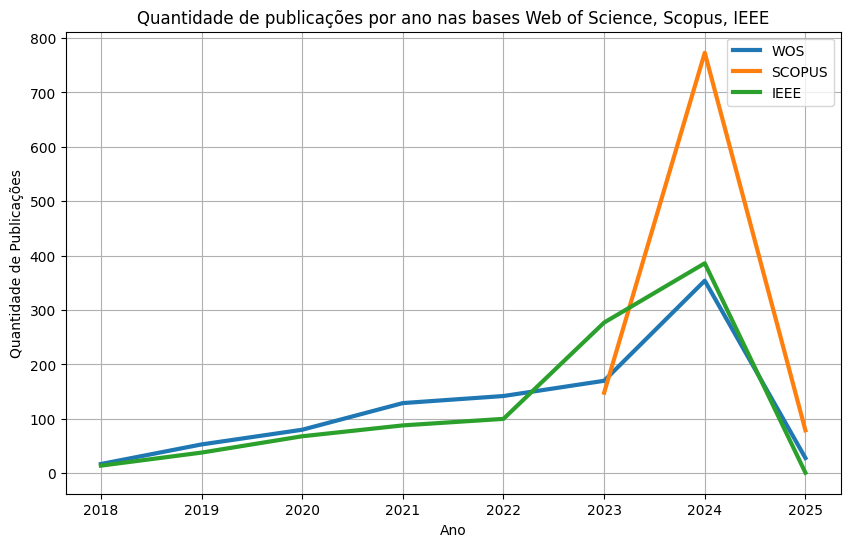

In [9]:
# Montando o gráfico das publicações por ano
plt.figure(figsize=(10,6))
plt.plot(df_wos_publicacoes_por_ano['Ano'], df_wos_publicacoes_por_ano['Quantidade'], label='WOS', linewidth=3)
plt.plot(df_scopus_publicacoes_por_ano['Ano'], df_scopus_publicacoes_por_ano['Quantidade'], label='SCOPUS', linewidth=3)
plt.plot(df_ieee_publicacoes_por_ano['Ano'], df_ieee_publicacoes_por_ano['Quantidade'], label='IEEE', linewidth=3)
plt.xlabel('Ano')
plt.ylabel('Quantidade de Publicações')
plt.title('Quantidade de publicações por ano nas bases Web of Science, Scopus, IEEE')
plt.grid(True)
plt.legend()
plt.show()

Após a seleção do período de relevância no volume de publicações, torna-se necessário analisar a existência de artigos repetidos, uma vez que as bases serão concatenadas.

In [10]:
# Removendo artigos sem títulos
df_wos_bruto = df_wos_bruto[df_wos_bruto['Article Title'].notna()]
df_scopus_bruto = df_scopus_bruto[df_scopus_bruto['Title'].notna()]
df_ieee_bruto = df_ieee_bruto[df_ieee_bruto['Document Title'].notna()]

In [11]:
# Verificando artigos repetidos nas bases
# Transformando os títulos em minúsculas
df_temp_titulo_wos = pd.DataFrame(df_wos_bruto['Article Title'].str.lower())
df_temp_titulo_scopus = pd.DataFrame(df_scopus_bruto['Title'].str.lower())
df_temp_titulo_ieee = pd.DataFrame(df_ieee_bruto['Document Title'].str.lower())
df_temp_titulo_wos['base'] = 'wos'
df_temp_titulo_ieee['base'] = 'ieee'
df_temp_titulo_scopus['base'] = 'scopus'
df_temp_titulo_wos['indice'] = df_wos_bruto.index
df_temp_titulo_ieee['indice'] = df_ieee_bruto.index
df_temp_titulo_scopus['indice'] = df_scopus_bruto.index
df_temp_titulo_wos.columns = ['titulo', 'base', 'indice']
df_temp_titulo_ieee.columns = ['titulo', 'base', 'indice']
df_temp_titulo_scopus.columns = ['titulo', 'base', 'indice']
df_temp_repeated = pd.concat([df_temp_titulo_wos, df_temp_titulo_scopus, df_temp_titulo_ieee])
df_temp_repeated['repeticoes'] = df_temp_repeated.groupby('titulo')['titulo'].transform('count')
df_temp_repeated = df_temp_repeated[df_temp_repeated['repeticoes'] > 1]
df_temp_repeated.sort_values(by=['repeticoes', 'titulo'], ascending=False, inplace=True)
df_temp_repeated.reset_index(inplace=True)
df_temp_repeated = pd.crosstab(df_temp_repeated['titulo'], columns=[df_temp_repeated['base']])
df_temp_repeated

base,ieee,scopus,wos
titulo,,,
"11th international conference on learning and collaboration technologies, lct 2024, held as part of the 26th international conference on human-computer interaction, hcii 2024",0,2,0
"19th international conference on hybrid artificial intelligence systems, hais 2024",0,2,0
"23rd epia conference on artificial intelligence, epia 2024",0,3,0
a decade of ai and animation convergence: a bibliometric analysis of contributions,1,1,0
"a review of data-centric artificial intelligence (dcai) and its impact on manufacturing industry: challenges, limitations, and future directions",1,0,1
...,...,...,...
unveiling the potential: artificial intelligence's negative impact on teaching and research considering ethics in higher education,0,1,1
use of generative artificial intelligence in educational environments: an initial student perspective of the risks and advantages,1,1,0
uses of artificial intelligence in health,1,0,1


Podemos notar a existência de títulos incorretos (periódicos ou eventos cadastrados neste campo), bem como a exixtência do mesmo artigo repetido em diferentes bases.

Portanto, optamos por concaatenar as três bases em um único DataFrame para remover os registros dupilados. Aproveitamos para selecionar os campos de interesse para esta pesquisa.

In [12]:
# Selecionando atributos e contatenando as bases
df_wos_tratado = df_wos_bruto[['Authors', 'Article Title', 'Source Title', 'Publication Year', 'Author Keywords',  'Abstract']]
df_wos_tratado.columns = ['Autores', 'Título', 'Fonte', 'Ano', 'Palavras-chave', 'Resumo']
df_wos_tratado['base'] = 'wos'
df_scopus_tratado = df_scopus_bruto[['Authors', 'Title', 'Source title', 'Year', 'Author Keywords', 'Abstract']]
df_scopus_tratado.columns = ['Autores', 'Título', 'Fonte', 'Ano', 'Palavras-chave', 'Resumo']
df_scopus_tratado['base'] = 'scopus'
df_ieee_tratado = df_ieee_bruto[['Authors', 'Document Title', 'Publication Title', 'Publication Year', 'Author Keywords', 'Abstract']]
df_ieee_tratado.columns = ['Autores', 'Título', 'Fonte', 'Ano', 'Palavras-chave', 'Resumo']
df_ieee_tratado['base'] = 'ieee'
df_tratado = pd.concat([df_wos_tratado, df_scopus_tratado, df_ieee_tratado])
df_tratado.reset_index(inplace=True, drop=True)

/tmp/ipykernel_3758/2032272829.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wos_tratado['base'] = 'wos'
/tmp/ipykernel_3758/2032272829.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scopus_tratado['base'] = 'scopus'
/tmp/ipykernel_3758/2032272829.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

Com a base concatenada, podemos retirar os artigos duplicados. Mas os erros de cadastros não foram removidos.

In [13]:
# Removendo os artigos repetidos
df_tratado['Título'] = df_tratado['Título'].str.lower()
df_tratado.drop_duplicates(subset=['Título'], inplace=True)
df_tratado.reset_index(inplace=True, drop=True)
df_tratado.head()

,Autores,Título,Fonte,Ano,Palavras-chave,Resumo,base
0,"Li, ZH; Zheng, L",the impact of artificial intelligence on accou...,PROCEEDINGS OF THE 2018 4TH INTERNATIONAL CONF...,2018,Artificial intelligence; Accounting profession...,"With the rapid development of economy, science...",wos
1,"Serova, E",artificial intelligence strategies and their i...,PROCEEDINGS OF THE 3RD EUROPEAN CONFERENCE ON ...,2021,artificial intelligence; machine learning; eme...,Understanding the exceptional role of intellig...,wos
2,"Bartelle, LB",the possible impacts of generative artificial ...,CADERNOS EDUCACAO TECNOLOGIA E SOCIEDADE,2024,artificial intelligence; generative artificial...,In order to discuss the possible impacts of IA...,wos
3,"Agrawal, A; Mchale, J; Oettl, A",superhuman science: how artificial intelligenc...,JOURNAL OF EVOLUTIONARY ECONOMICS,2023,Artificial intelligence; Innovation; R&D prior...,New product innovation in fields like drug dis...,wos
4,"Shi, YL",the impact of artificial intelligence on the a...,CYBER SECURITY INTELLIGENCE AND ANALYTICS,2020,Artificial intelligence; Accounting industry; ...,With the development of artificial intelligenc...,wos


Uma vez que as tuplas repetidas foram removidas, podemos totalizar a quantidade de publicações por fonte (periódicos de publicações)

In [14]:
# transformando as fontes (periódicos), em minúsculas
df_tratado['Fonte'] = df_tratado['Fonte'].str.lower()

In [15]:
df_dispersao_publicacoes = df_tratado['Fonte'].str.rstrip()
df_dispersao_publicacoes = pd.DataFrame(df_dispersao_publicacoes.value_counts())
df_dispersao_publicacoes.reset_index(inplace=True)
df_dispersao_publicacoes.rename(columns={'Fonte': 'Quantidade'}, inplace=True)
df_dispersao_publicacoes.rename(columns={'index':'Fonte'}, inplace=True)


In [16]:
corte = 0
#df_dispersao_publicacoes = df_ieee_fonte
df_dispersao_publicacoes = df_dispersao_publicacoes[df_dispersao_publicacoes['Quantidade'] >= corte]
print(df_dispersao_publicacoes.head(31))
print('\nQuabtidade de periódicos:', len(df_dispersao_publicacoes))
print('Quantidade de publicações:', df_dispersao_publicacoes['Quantidade'].sum())

                                                Fonte  Quantidade
0                                         ieee access          48
1      acm international conference proceeding series          39
2   lecture notes in computer science (including s...          29
3   2024 asu international conference in emerging ...          18
4                frontiers in artificial intelligence          18
5         ieee transactions on engineering management          17
6                           ceur workshop proceedings          14
7                                      sustainability          13
8   2024 4th international conference on advance c...          13
9   proceedings of the european conference on the ...          13
10  proceedings of the 3rd european conference on ...          13
11  communications in computer and information sci...          13
12  asee annual conference and exposition, confere...          13
13              lecture notes in networks and systems          12
14        

/tmp/ipykernel_3758/3061541154.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dispersao_publicacoes_crop['Fonte'] = df_dispersao_publicacoes_crop['Fonte'].str[:qtd_letras]
/tmp/ipykernel_3758/3061541154.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dispersao_publicacoes_crop.sort_values(by='Quantidade', ascending=False, inplace=True)


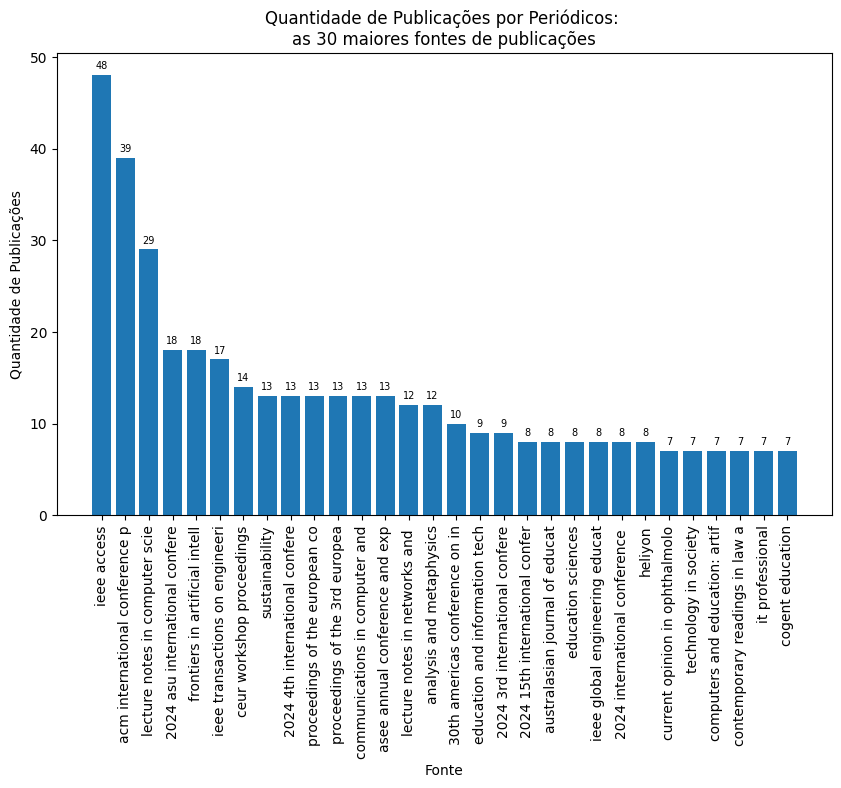

In [17]:
# Visualização da frequência de publicações (os 30 maiores períódicos, em números de publicações)
qtd_fontes = 30
qtd_letras = 30
df_dispersao_publicacoes_crop = df_dispersao_publicacoes.head(qtd_fontes)
df_dispersao_publicacoes_crop['Fonte'] = df_dispersao_publicacoes_crop['Fonte'].str[:qtd_letras]
df_dispersao_publicacoes_crop.sort_values(by='Quantidade', ascending=False, inplace=True)

fig, ax = plt.subplots(figsize=(10,6))
grupo = plt.bar(df_dispersao_publicacoes_crop['Fonte'], df_dispersao_publicacoes_crop['Quantidade'])
plt.xlabel('Fonte')
plt.ylabel('Quantidade de Publicações')
plt.title('Quantidade de Publicações por Periódicos: \nas '+str(qtd_fontes)+' maiores fontes de publicações')
plt.xticks(rotation=90)
autolabel(grupo)
plt.show()

### Análise de Bradford

A análise da Figura 2 revela uma significativa dispersão das publicações entre diferentes perió-
dicos. Embora os periódicos com maior índice de disseminação apresentem um número considerável
de publicações, este é relativamente baixo quando comparado ao total de artigos relevantes publica-
dos.
A tabela 2 apresenta a totalização dessas publicações, considerando a quantidade de fontes
associadas a cada total. Observa-se claramente que, à medida que o número de publicações por
periódico diminui, aumenta o número de fontes que as publicam. Dessa forma, as fontes com menor
número de publicações tornam-se menos relevantes no contexto do tema pesquisado (Lousada et al.,2012).

In [18]:
df_contagem_publicacoes = pd.DataFrame(df_dispersao_publicacoes.groupby('Quantidade').count()['Fonte'].sort_index(ascending=False))
df_contagem_publicacoes.reset_index(inplace=True)
df_contagem_publicacoes.rename(columns={'Quantidade':'Qtd.Publicações', 'Fonte': 'Qtd.Fontes'}, inplace=True)
Total_Fontes = []
temp = []
Total_Publicacoes = []
Log_Total_Fontes = []
for i in range(len(df_contagem_publicacoes)):
  Total_Fontes.append(df_contagem_publicacoes['Qtd.Fontes'].iloc[i]+df_contagem_publicacoes['Qtd.Fontes'].iloc[:i].sum())
  temp.append(df_contagem_publicacoes['Qtd.Publicações'].iloc[i]*df_contagem_publicacoes['Qtd.Fontes'].iloc[i])
  Total_Publicacoes.append(temp[i]+sum(temp[:i]))
  Log_Total_Fontes.append(np.log10(Total_Fontes[-1]))

df_contagem_publicacoes['Total_Fontes'] = Total_Fontes
df_contagem_publicacoes['Total_Publicacoes'] = Total_Publicacoes
df_contagem_publicacoes['Log_Total_Fontes'] = Log_Total_Fontes
#df_contagem_publicacoes['Fonte'] = df_dispersao_publicacoes['Fonte']
print(df_contagem_publicacoes)

    Qtd.Publicações  Qtd.Fontes  Total_Fontes  Total_Publicacoes  \
0                48           1             1                 48   
1                39           1             2                 87   
2                29           1             3                116   
3                18           2             5                152   
4                17           1             6                169   
5                14           1             7                183   
6                13           6            13                261   
7                12           2            15                285   
8                10           1            16                295   
9                 9           2            18                313   
10                8           6            24                361   
11                7           9            33                424   
12                6          12            45                496   
13                5          12            57   

In [19]:
# Pegando o total de periódicos
total_periodicos = df_contagem_publicacoes['Total_Fontes'][df_contagem_publicacoes.index[-1]]
total_publicacoes = df_contagem_publicacoes['Total_Publicacoes'][df_contagem_publicacoes.index[-1]]
print('Total de periódicos:', total_periodicos)
print('Total de Publicações: ', total_publicacoes)

Total de periódicos: 1844
Total de Publicações:  2838


Na etapa seguinte, a análise de dispersão das publicações foi realizada com o objetivo de identificar os agrupamentos difusores, conforme previsto pela Lei de Bradford (Grácio, 2020) e (Lousada et al., 2012). Para isso, as fontes dos artigos foram organizadas em três grupos distintos, ordenados de acordo com a quantidade de publicações. A distribuição seguiu o critério de divisão do total de publicações em três partes iguais, resultando em um valor de referência de 2838/3 = 946. Dessa forma, o núcleo de Bradford, que representa as fontes mais relevantes, corresponde ao conjunto de publicações até a linha destacada na Tabela 2. Pode-se, então, afirmar que, para cada periódico pertencente à classe mais relevante, existem doze outros de menor relevância, evidenciando a concentração da produção científica em 155 fontes de alto impacto (periódicos).

In [20]:
divisoes = 3
corte = df_contagem_publicacoes['Total_Publicacoes'].iloc[-1]/divisoes #2838/3 = 946
df_contagem_publicacoes_temp = df_contagem_publicacoes[df_contagem_publicacoes['Total_Publicacoes'] <= corte]

# Pegando o total do primeiro núcleo de Bradford
total_periodicos_terco = df_contagem_publicacoes_temp['Total_Fontes'][df_contagem_publicacoes_temp.index[-1]]
total_artigos_terco = df_contagem_publicacoes_temp['Total_Publicacoes'][df_contagem_publicacoes_temp.index[-1]]
print('Total de periódicos do priméiro núcleo de Bradfod:', total_periodicos_terco)
print('Total de publicações do priméiro núcleo de Bradfod: ', total_artigos_terco)
df_contagem_publicacoes_temp

Total de periódicos do priméiro núcleo de Bradfod: 165
Total de publicações do priméiro núcleo de Bradfod:  907


,Qtd.Publicações,Qtd.Fontes,Total_Fontes,Total_Publicacoes,Log_Total_Fontes
0,48,1,1,48,0.000000
1,39,1,2,87,0.301030
2,29,1,3,116,0.477121
3,18,2,5,152,0.698970
4,17,1,6,169,0.778151
5,14,1,7,183,0.845098
6,13,6,13,261,1.113943
7,12,2,15,285,1.176091
8,10,1,16,295,1.204120
9,9,2,18,313,1.255273


Text(0, 0.5, 'Total de Publicações')

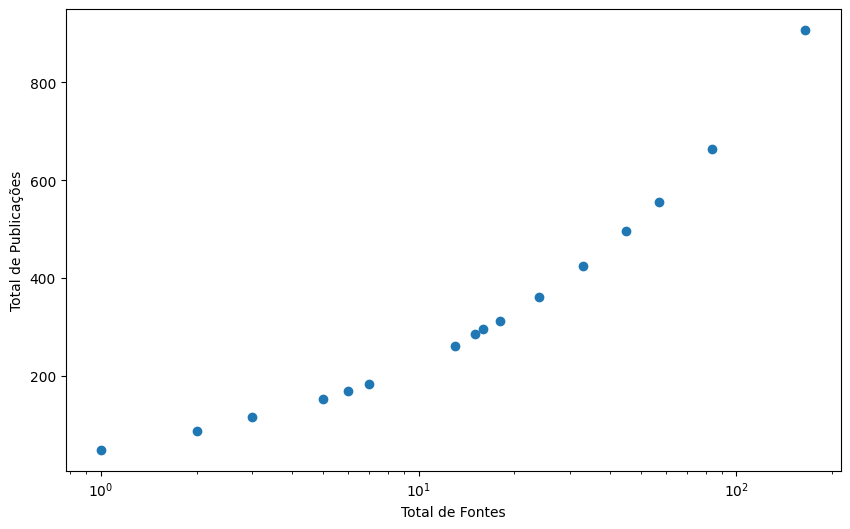

In [21]:
plt.figure(figsize=(10,6))
plt.xscale('log',base=10)
plt.scatter(df_contagem_publicacoes_temp['Total_Fontes'], df_contagem_publicacoes_temp['Total_Publicacoes'])
plt.xlabel('Total de Fontes')
plt.ylabel('Total de Publicações')

In [22]:
#Calculando a taxa de Bradford
taxa_bradford = (total_periodicos/total_periodicos_terco)
print('Taxa de Bradford:', taxa_bradford)

Taxa de Bradford: 11.175757575757576


Conforme observado no levantamento da Taxa de Bradford, são necessários aproximadamente 12,2 artigos para que um deles seja considerado relevante. Podemos concluir ainda que existem cerca de 155 periódicos e 850 artigos relevantes. Tal número elevado de publicações e periódicos deve-se à elevada Taxa de Bradford, que provavelmente está alta devido ao curto intervalo de publicações: o tema parece ser bem recente e portanto ainda não foi possível obter-se um grupo mais definido de periódicos relevantes.

Neste caso, vammos fazer um estudo mais detalhado, para entender este fenômeno.

## Análise da frequência da quantidade de publicações



Cálculo dos valores centrais

In [23]:
valor_min_publicacoes = df_contagem_publicacoes_temp['Qtd.Publicações'].min()
df_dispersao_publicacoes_elite = df_dispersao_publicacoes[df_dispersao_publicacoes['Quantidade'] >= valor_min_publicacoes]
print('Seleção dos periódicos dentro do intervalo de máxima relevância')
print(df_dispersao_publicacoes_elite)
print('\nQuantidade de periódicos:', len(df_dispersao_publicacoes_elite))
print('Quantidade de publicações:', df_dispersao_publicacoes_elite['Quantidade'].sum())
media_publicacoes = df_dispersao_publicacoes_elite['Quantidade'].mean()
std_publicacoes = df_dispersao_publicacoes_elite['Quantidade'].std()
mediana_publicacoes = df_dispersao_publicacoes_elite['Quantidade'].median()
moda_publicacoes = df_dispersao_publicacoes_elite['Quantidade'].mode()
print('\nMédia de publicações:', media_publicacoes)
print('Desvio padrão de publicações:', std_publicacoes)
print('Mediana de publicações:', mediana_publicacoes)
print('Moda de publicações:', moda_publicacoes)

Seleção dos periódicos dentro do intervalo de máxima relevância
                                                 Fonte  Quantidade
0                                          ieee access          48
1       acm international conference proceeding series          39
2    lecture notes in computer science (including s...          29
3    2024 asu international conference in emerging ...          18
4                 frontiers in artificial intelligence          18
..                                                 ...         ...
160  2024 4th international conference on innovativ...           3
161  2022 2nd international conference on advance c...           3
162  2024 international conference on communication...           3
163  2022 5th international conference on contempor...           3
164  2024 11th international conference on computin...           3

[165 rows x 2 columns]

Quantidade de periódicos: 165
Quantidade de publicações: 907

Média de publicações: 5.496969696969697
Desvi

In [24]:
df_dispersao_publicacoes_elite_grupo = df_dispersao_publicacoes_elite.groupby('Quantidade').count()
df_dispersao_publicacoes_elite_grupo.reset_index(inplace=True)
df_dispersao_publicacoes_elite_grupo.rename(columns={'Quantidade': 'qtd_publicacoes', 'Fonte': 'qtd_periódicos'}, inplace=True)
print(df_dispersao_publicacoes_elite_grupo)

    qtd_publicacoes  qtd_periódicos
0                 3              81
1                 4              27
2                 5              12
3                 6              12
4                 7               9
5                 8               6
6                 9               2
7                10               1
8                12               2
9                13               6
10               14               1
11               17               1
12               18               2
13               29               1
14               39               1
15               48               1


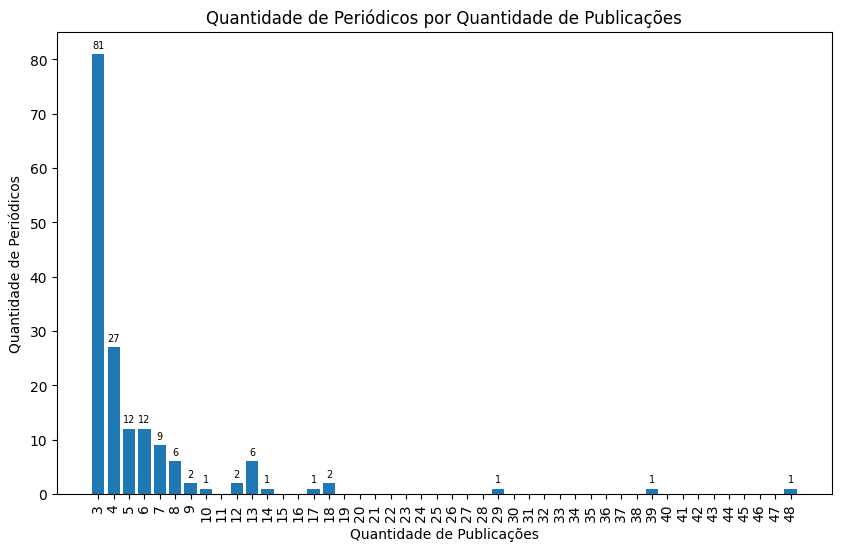

In [25]:
# visualizando dados
eixo_x = range(df_dispersao_publicacoes_elite_grupo['qtd_publicacoes'].min(), df_dispersao_publicacoes_elite_grupo['qtd_publicacoes'].max()+1)
figure, ax = plt.subplots(figsize=(10,6))
grupo = plt.bar(df_dispersao_publicacoes_elite_grupo['qtd_publicacoes'], df_dispersao_publicacoes_elite_grupo['qtd_periódicos'])
ax.set_xticks(eixo_x)
plt.xlabel('Quantidade de Publicações')
plt.ylabel('Quantidade de Periódicos')
plt.title('Quantidade de Periódicos por Quantidade de Publicações')
plt.xticks(rotation=90)
autolabel(grupo)
plt.show()

Como descrito por Bradford, a distribuição de frequência de periódicos cresce de ordem exponencial à medida que o número de publicações diminui.

Salvando os dados da base que pertencem aos periódicos de elite

In [26]:
# salvando a base até a filtragem por periódicos de elite.
df_tratado = df_tratado[df_tratado['Fonte'].isin(df_dispersao_publicacoes_elite['Fonte'])]
df_tratado.reset_index(inplace=True, drop=True)
df_tratado.to_csv('../Base_dados/df_tratado.csv', index=False)
df_tratado

,Autores,Título,Fonte,Ano,Palavras-chave,Resumo,base
0,"Serova, E",artificial intelligence strategies and their i...,proceedings of the 3rd european conference on ...,2021,artificial intelligence; machine learning; eme...,Understanding the exceptional role of intellig...,wos
1,"Li, LY",research on the impact of artificial intellige...,2024 7th international conference on artificia...,2024,International Procurement; Digitization; Artif...,The rapid development of information technolog...,wos
2,"Korteling, JE; Van de Boer-Visschedijk, GC; Bl...",human- versus artificial intelligence,frontiers in artificial intelligence,2021,human intelligence; artificial intelligence; a...,AI is one of the most debated subjects of toda...,wos
3,"McGregor, S",a scaled multiyear responsible artificial inte...,computer,2023,Artificial intelligence; Social factors,The IBM Watson AI XPRIZE was a US$5 million co...,wos
4,"Sample, C; Shelton, C; McAndrew, I; Justice, C",the impact of artificial intelligence on unive...,proceedings of the european conference on the ...,2019,Artificial Intelligence; cyber security educat...,Artificial intelligence (AI) is expected to tr...,wos
...,...,...,...,...,...,...,...
886,Z. Shi; H. Jiang; S. Jiao,research on the impact of big data resources o...,2023 ieee 3rd international conference on info...,2023,big data resources;big data capabilities;digit...,In view of the impact mechanism of big data re...,ieee
887,P. Anawade; S. Chib; D. Sharma,impact of ai based marketing on performance of...,2024 2nd dmiher international conference on ar...,2024,Two-Wheeler Businesses;Artificial Intelligence...,The electric vehicle (EV) industry is being tr...,ieee
888,H. Jammeli; A. Khefacha; B. Séllei; J. Verny,the impact of ai tools in education environment,2024 12th international conference on informat...,2024,Artificial Intelligence Tools;Emotional Intell...,Artificial Intelligence (AI) is rapidly gainin...,ieee
889,A. Kusmiatun; D. Efendi; M. J. A. Pansori; L. ...,the power of ai in generating novel based and ...,2024 4th international conference on advance c...,2024,Artificial Intelligence;Literature;Narrative;C...,The intersection of artificial intelligence (A...,ieee


## Tratando os dados por autores

In [27]:
# Lendo a base tratada anterormente
df_tratado = pd.read_csv('../Base_dados/df_tratado.csv')
# removendo registros sem autores
df_tratado = df_tratado[df_tratado['Autores'].notna()]
df_tratado['Autores'] = df_tratado['Autores'].astype(str)
df_tratado.head()

,Autores,Título,Fonte,Ano,Palavras-chave,Resumo,base
0,"Serova, E",artificial intelligence strategies and their i...,proceedings of the 3rd european conference on ...,2021,artificial intelligence; machine learning; eme...,Understanding the exceptional role of intellig...,wos
1,"Li, LY",research on the impact of artificial intellige...,2024 7th international conference on artificia...,2024,International Procurement; Digitization; Artif...,The rapid development of information technolog...,wos
2,"Korteling, JE; Van de Boer-Visschedijk, GC; Bl...",human- versus artificial intelligence,frontiers in artificial intelligence,2021,human intelligence; artificial intelligence; a...,AI is one of the most debated subjects of toda...,wos
3,"McGregor, S",a scaled multiyear responsible artificial inte...,computer,2023,Artificial intelligence; Social factors,The IBM Watson AI XPRIZE was a US$5 million co...,wos
4,"Sample, C; Shelton, C; McAndrew, I; Justice, C",the impact of artificial intelligence on unive...,proceedings of the european conference on the ...,2019,Artificial Intelligence; cyber security educat...,Artificial intelligence (AI) is expected to tr...,wos


In [28]:
print(df_tratado[df_tratado['base']=='wos']['Autores'].head(10))
print('\n')
print(df_tratado[df_tratado['base']=='scopus']['Autores'].head(10))
print('\n')
print(df_tratado[df_tratado['base']=='ieee']['Autores'].head(10))

0                                            Serova, E
1                                               Li, LY
2    Korteling, JE; Van de Boer-Visschedijk, GC; Bl...
3                                          McGregor, S
4       Sample, C; Shelton, C; McAndrew, I; Justice, C
5                                          Polunina, O
6                                           Kshetri, N
7                               Humble, N; Mozelius, P
8          Zheng, CJ; Johnson, TV; Garg, A; Boland, MV
9      Saukkonen, J; Huhtala, M; Rantonen, M; Vaara, E
Name: Autores, dtype: object


234    Elmorsy G.N.; Al-Muoaeweed O.; Yahya H.T.A.; Z...
235                          Rameshbhai K.M.; Prakash P.
236                   Adam I.O.; Alhassan M.D.; Diack A.
237                                      Zhang N.; Li X.
238                                      Ran X.; Zeng Y.
239             Wang X.; Xu X.; Zhang Y.; Hao S.; Jie W.
240                                    Zhang Y.; Miao M.
241    Qi W.; Liu M.

In [29]:
# padronizando os nomes dos autores
df_tratado['Autores'] = df_tratado['Autores'].str.replace(',', ' ')
df_tratado['Autores'] = df_tratado['Autores'].str.replace('.;', ';')
df_tratado['Autores'] = df_tratado['Autores'].str.replace('.', ' ')
df_tratado['Autores'] = df_tratado['Autores'].str.replace('  ', ' ')
df_tratado['Autores'] = df_tratado['Autores'].str.replace('; ', ';')
df_tratado['Autores'] = df_tratado['Autores'].str.lower()

# no caso da ieee, inverter o nome e sobrenome dos autores
for index, row in df_tratado.iterrows():
  if row['base'] == 'ieee':
    lista_autores = row['Autores'].split(';')
    autores_modificados = []
    for autor in lista_autores:
      p = autor.split()
      if len(p) == 2:
        autor = p[1]+' '+p[0]
      elif len(p) == 3:
        autor = p[2]+' '+p[0]+' '+p[1]
      autores_modificados.append(autor)
    df_tratado.loc[index, 'Autores'] = ';'.join(autores_modificados)

print(df_tratado[df_tratado['base']=='wos']['Autores'].head(10))
print('\n')
print(df_tratado[df_tratado['base']=='scopus']['Autores'].head(10))
print('\n')
print(df_tratado[df_tratado['base']=='ieee']['Autores'].head(10))

0                                             serova e
1                                                li ly
2    korteling j;van de boer-visschedijk g;blankend...
3                                           mcgregor s
4                 sample ;shelton ;mcandrew ;justice c
5                                           polunina o
6                                            kshetri n
7                                   humble ;mozelius p
8                    zheng c;johnson t;garg ;boland mv
9                saukkonen ;huhtala ;rantonen ;vaara e
Name: Autores, dtype: object


234    elmorsy g n;al-muoaeweed o;yahya h t a;zaher a...
235                            rameshbhai k m;prakash p 
236                       adam i o;alhassan m d;diack a 
237                                        zhang n;li x 
238                                        ran x;zeng y 
239                     wang x;xu x;zhang y;hao s;jie w 
240                                      zhang y;miao m 
241       qi w;liu m

/tmp/ipykernel_3758/623379577.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_tratado['Autores'] = df_tratado['Autores'].str.replace('.;', ';')
/tmp/ipykernel_3758/623379577.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_tratado['Autores'] = df_tratado['Autores'].str.replace('.', ' ')


In [30]:
lst_autores_wos = df_tratado[df_tratado['base']=='wos']['Autores'].str.split(';').to_numpy()
lst_autores_scopus = df_tratado[df_tratado['base']=='scopus']['Autores'].str.split(';').to_numpy()
lst_autores_ieee = df_tratado[df_tratado['base']=='ieee']['Autores'].str.split(';').to_numpy()

lst_autores_wos    = [item for sublist in lst_autores_wos if isinstance(sublist, list)
                           for item in sublist if isinstance(item, str)]
lst_autores_scopus = [item for sublist in lst_autores_scopus if isinstance(sublist, list)
                           for item in sublist if isinstance(item, str)]
lst_autores_ieee = [item for sublist in lst_autores_ieee if isinstance(sublist, list)
                           for item in sublist if isinstance(item, str)]

#for i in range(len(lst_autores_ieee)):
#  p = lst_autores_ieee[i].split()
#  if len(p) == 2:
#    lst_autores_ieee[i] = p[1]+' '+p[0]
#  elif len(p) == 3:
#    lst_autores_ieee[i] = p[2]+' '+p[0]+' '+p[1]

print(lst_autores_wos[:10])
print(lst_autores_scopus[:10])
print(lst_autores_ieee[:10])

['serova e', 'li ly', 'korteling j', 'van de boer-visschedijk g', 'blankendaal ra', 'boonekamp r', 'eikelboom ar', 'mcgregor s', 'sample ', 'shelton ']
['elmorsy g n', 'al-muoaeweed o', 'yahya h t a', 'zaher a m n ', 'rameshbhai k m', 'prakash p ', 'adam i o', 'alhassan m d', 'diack a ', 'zhang n']
['kim s j', 'neh', 'mohant s', 'alfurhoo b s', 'bakhar r', 'poongavana s', 'khanna r', 'kandee m e', 'elrefae g', 'zhufen y']


In [31]:
df_total_autores_wos    = pd.DataFrame(lst_autores_wos, columns=['Autores'])
df_total_autores_scopus = pd.DataFrame(lst_autores_scopus, columns=['Autores'])
df_total_autores_ieee   = pd.DataFrame(lst_autores_ieee, columns=['Autores'])

df_total_autores_wos    = df_total_autores_wos.value_counts('Autores')
df_total_autores_scopus = df_total_autores_scopus.value_counts('Autores')
df_total_autores_ieee   = df_total_autores_ieee.value_counts('Autores')

df_total_autores_wos    = pd.DataFrame(df_total_autores_wos)
df_total_autores_scopus = pd.DataFrame(df_total_autores_scopus)
df_total_autores_ieee   = pd.DataFrame(df_total_autores_ieee)

df_total_autores_wos.columns = ['wos']
df_total_autores_scopus.columns = ['scopus']
df_total_autores_ieee.columns = ['ieee']

df_total_autores = pd.concat([df_total_autores_wos, df_total_autores_scopus, df_total_autores_ieee], axis=1)
df_total_autores.fillna(0, inplace=True)
df_total_autores.reset_index(inplace=True)
df_total_autores['total'] = df_total_autores['wos']+df_total_autores['scopus']+df_total_autores['ieee']
df_total_autores.sort_values(by='total', ascending=False, inplace=True)
#df_total_autores = df_total_autores[df_total_autores['total'] > 0]
df_total_autores.fillna(0, inplace=True)

print(df_total_autores_wos.head(10),'\n')
print(df_total_autores_scopus.head(10), '\n')
print(df_total_autores_ieee.head(10), '\n')
print(df_total_autores)

print('\nTotal de participações autorais: ', df_total_autores['total'].sum())


         wos
Autores     
wang       6
liu        6
li         4
chen       3
li x       3
zhao c     3
chen p     3
li y       3
gao x      3
tagde      3 

                scopus
Autores               
wang s               3
wang x               3
mozelius p           3
alario-hoyos c       3
lin y                3
wang z               2
gu m                 2
liu q                2
horak j              2
sobral s r           2 

              ieee
Autores           
khalif m         4
saddhon k        4
wang y           4
cherniavsk o     3
tiwar a          3
sing s           3
kuma a           2
christia m       2
alba m           2
mohamed n        2 

                 Autores  wos  scopus  ieee  total
36                wang y  2.0     2.0   4.0    8.0
0                  wang   6.0     0.0   0.0    6.0
1                   liu   6.0     0.0   0.0    6.0
7                   li y  3.0     1.0   1.0    5.0
259               wang s  1.0     3.0   0.0    4.0
...                  ...  ..

/tmp/ipykernel_3758/3618255312.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.bar(df_total_autores['Autores'][:20], df_total_autores['wos'][:20], label='Web of Science')
/tmp/ipykernel_3758/3618255312.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.bar(df_total_autores['Autores'][:20], df_total_autores['scopus'][:20], bottom=df_total_autores['wos'][:20], label='scopus')
/tmp/ipykernel_3758/3618255312.py:4: FutureWarning: The behavior of `series[i:j]` with an inte

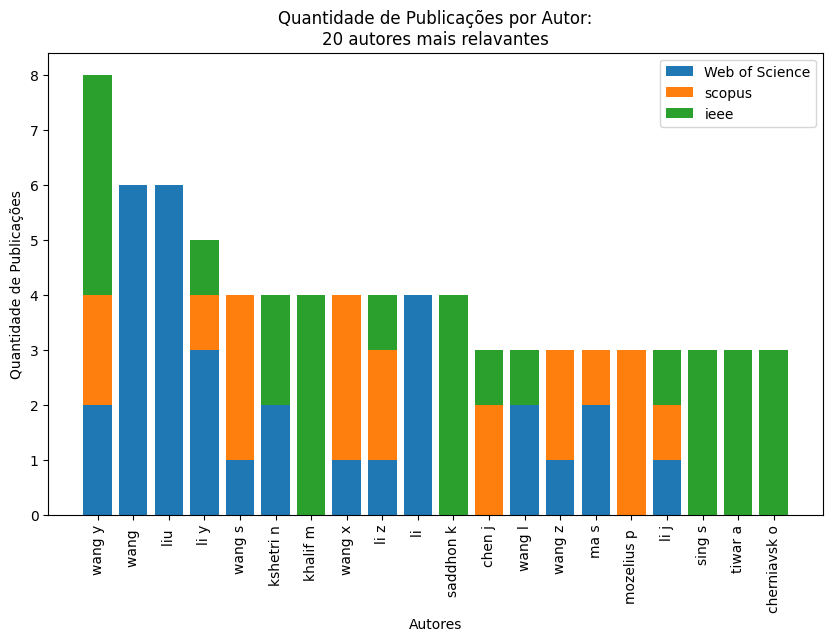

In [32]:
plt.figure(figsize=(10,6))
plt.bar(df_total_autores['Autores'][:20], df_total_autores['wos'][:20], label='Web of Science')
plt.bar(df_total_autores['Autores'][:20], df_total_autores['scopus'][:20], bottom=df_total_autores['wos'][:20], label='scopus')
plt.bar(df_total_autores['Autores'][:20], df_total_autores['ieee'][:20], bottom=df_total_autores['wos'][:20]+df_total_autores['scopus'][:20], label='ieee')
plt.xlabel('Autores')
plt.ylabel('Quantidade de Publicações')
plt.title('Quantidade de Publicações por Autor:\n20 autores mais relavantes')
plt.legend()
plt.ylabel('Quantidade de Publicações')
plt.xticks(rotation=90)
plt.xlabel('Autores')
plt.show()

## Testando a Lei Lotka

   qtd_publicações  qtd_autores  total_autores  \
0                8            1              1   
1                6            2              3   
2                5            1              4   
3                4            7             11   
4                3           20             31   
5                2          150            181   
6                1         2651           2832   

   total__participações_publicações  
0                                 8  
1                                20  
2                                25  
3                                53  
4                               113  
5                               413  
6                              3064  
Quantidade de autores com 1 publicação: 6    2651
Name: qtd_autores, dtype: int64


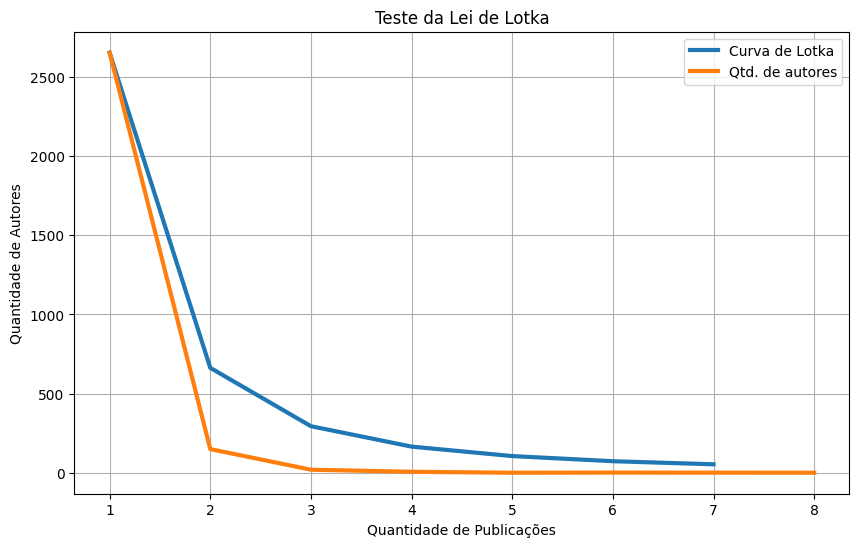

In [33]:
def lei_lotka(n, a1):
  an = a1 * (1/(n**2))
  return an

total_autores_por_publicacao = df_total_autores['total'].value_counts().sort_index(ascending=False)
total_autores_por_publicacao = pd.DataFrame(total_autores_por_publicacao)
total_autores_por_publicacao.reset_index(inplace=True)
total_autores_por_publicacao.columns = ['qtd_publicações', 'qtd_autores']
total_autores_por_publicacao['qtd_publicações'] = total_autores_por_publicacao['qtd_publicações'].astype(int)
total_autores_por_publicacao.astype(int)

total_autores_por_publicacao['total_autores'] = total_autores_por_publicacao['qtd_autores'].cumsum()

total_autores_por_publicacao['total__participações_publicações'] = (total_autores_por_publicacao['qtd_publicações'] *
                                                    total_autores_por_publicacao['qtd_autores']).cumsum()

print(total_autores_por_publicacao)

qtd_autores_1_pub = total_autores_por_publicacao['qtd_autores'][total_autores_por_publicacao['qtd_publicações'] == 1]
print('Quantidade de autores com 1 publicação:', qtd_autores_1_pub)

lei_lotka_autores = []
for i in range(1, 8):
  lei_lotka_autores.append([lei_lotka(i, qtd_autores_1_pub),i])
#print(lei_lokta_autores)

figure, ax = plt.subplots(figsize=(10,6))
ax.plot([i[1] for i in lei_lotka_autores], [i[0] for i in lei_lotka_autores], label='Curva de Lotka', linewidth=3)
ax.plot(total_autores_por_publicacao['qtd_publicações'], total_autores_por_publicacao['qtd_autores'], label='Qtd. de autores', linewidth=3)
ax.set_xticks([i for i in range(1,total_autores_por_publicacao['qtd_publicações'].max()+1)])
ax.grid(True)
ax.set_xlabel('Quantidade de Publicações')
ax.set_ylabel('Quantidade de Autores')
ax.set_title('Teste da Lei de Lotka')
ax.legend()
plt.show()

In [34]:
corte = total_autores_por_publicacao['total__participações_publicações'].iloc[-1] / 3
print('Valor de corte de participações:', corte)
total_autores_por_publicacao_temp = total_autores_por_publicacao[total_autores_por_publicacao['total__participações_publicações']<=corte]
print(total_autores_por_publicacao_temp)
print('\nTotal de autores:', total_autores_por_publicacao_temp['qtd_autores'].sum())

Valor de corte de participações: 1021.3333333333334
   qtd_publicações  qtd_autores  total_autores  \
0                8            1              1   
1                6            2              3   
2                5            1              4   
3                4            7             11   
4                3           20             31   
5                2          150            181   

   total__participações_publicações  
0                                 8  
1                                20  
2                                25  
3                                53  
4                               113  
5                               413  

Total de autores: 181


In [35]:
df_total_autores = df_total_autores[df_total_autores['total'] >= total_autores_por_publicacao_temp['qtd_publicações'].min()]
df_total_autores.reset_index(inplace=True, drop=True)
print(df_total_autores)

        Autores  wos  scopus  ieee  total
0        wang y  2.0     2.0   4.0    8.0
1         wang   6.0     0.0   0.0    6.0
2          liu   6.0     0.0   0.0    6.0
3          li y  3.0     1.0   1.0    5.0
4        wang s  1.0     3.0   0.0    4.0
..          ...  ...     ...   ...    ...
176    crisci a  1.0     0.0   1.0    2.0
177  sobral s r  0.0     2.0   0.0    2.0
178       liu y  0.0     1.0   1.0    2.0
179     horak j  0.0     2.0   0.0    2.0
180       liu q  0.0     2.0   0.0    2.0

[181 rows x 5 columns]


In [36]:
# obtendo a relação de autores para cada periódico
df_tratado_periodicos_autores = df_tratado.groupby('Fonte')['Autores'].apply(list)
df_tratado_periodicos_autores = pd.DataFrame(df_tratado_periodicos_autores)
df_tratado_periodicos_autores.reset_index(inplace=True)
df_tratado_periodicos_autores.columns = ['Fonte', 'Autores']

#obtendo a lista de periódicos
ls_periodicos = df_dispersao_publicacoes_elite['Fonte'].to_list()
ls_periodicos = df_dispersao_publicacoes_elite[df_dispersao_publicacoes_elite['Fonte'].isin(df_tratado['Fonte'])]['Fonte'].to_list()

df_tratado_periodicos_autores['ordem'] = df_tratado_periodicos_autores['Fonte'].map({fonte: i for i, fonte in enumerate(ls_periodicos)})
df_tratado_periodicos_autores.sort_values(by='ordem', inplace=True)
df_tratado_periodicos_autores.reset_index(inplace=True, drop=True)
df_tratado_periodicos_autores.drop(columns=['ordem'], inplace=True)
for i in range(3):
  print(df_tratado_periodicos_autores['Fonte'][i])
  for j in df_tratado_periodicos_autores['Autores'][i]:
    print(j)
  print('\n')

ieee access
mohamed y;khanan ;bashir ;mohamed ahh;adiel ma;elsadig ma
chen l;chen p;lin zj
liu j;kong x;xia ;bai x;wang ;qing ;lee i
zhang y;xiong ;xie ;fan ;gu hf
wang ;liu ;lin w;chen ;yang ja
shrifan nhm;akbar m;isa nam
mohamed y;khanan ;bashir ;mohamed ahh;adiel ma;elsadig ma
kovacevic ;demic e
xing y 
almagrabi a o;khan r a 
cubillos c;mellado r;cabrera-paniagua d;urra e 
mittal u;sai s;chamola v;sangwan d 
ahmed z;shanto s s;rime m h k;morol m k;fahad n;hossen m j;abdullah-al-jubair m 
kim s j
jia w;zhan x;d’souza f
buka u a;sayee m s;s fatimah abdul raza;yogaraya s;sneesl r
afzaa m;shansha x;ya d;younas m
moghada m p;moghada z a;m r c qazan;pławia p;alizadehsani r
ca y;wang y
yudhistyr w i;srinuan c
abi m;ben-salh o;kanetak z;sekrafi h
pawu d;porażk t;paszkiel s
jave h;muqee h a;danes a;rehma a u;jave t;bermak a
zafar m;bazargan j s;sadeghi-niarak a;choi s -m
mural d k;pand s k;dash s p
raiko a n;pirani m
cha p -j;hs t -h;li t -p;cheng y -h
kuznetso o;sernan p;rome l;fronton e;m

In [37]:
# Salvando a base de dados filtrado os autores relevantes

# Convert the 'Autores' column to string type before applying the lambda function
df_tratado['Autores'] = df_tratado['Autores'].astype(str)

# Criar um conjunto de autores válidos para busca eficiente
autores_validos_set = set(df_total_autores['Autores'])
# Filtrar artigos que tenham pelo menos um autor válido
df_tratado = df_tratado[df_tratado['Autores'].apply(lambda x: any(autor in autores_validos_set for autor in x.split(';')))]

df_tratado.reset_index(inplace=True, drop=True)
df_tratado.to_csv('../Base_dados/df_tratado.csv', index=False)
df_tratado

,Autores,Título,Fonte,Ano,Palavras-chave,Resumo,base
0,serova e,artificial intelligence strategies and their i...,proceedings of the 3rd european conference on ...,2021,artificial intelligence; machine learning; eme...,Understanding the exceptional role of intellig...,wos
1,polunina o,is artificial intelligence disruptive?,proceedings of the european conference on the ...,2019,artificial intelligence; Fourth Industrial Rev...,The paper aims to analyze the risks and hazard...,wos
2,kshetri n,the environmental impact of artificial intelli...,it professional,2024,Training; Costs; Energy efficiency; Artificial...,This article examines the significant energy a...,wos
3,mohamed y;khanan ;bashir ;mohamed ahh;adiel ma...,the impact of artificial intelligence on langu...,ieee access,2024,Reviews; Artificial intelligence,"Presents corrections to the paper, The Impact ...",wos
4,wang j;tian h;zheng ph,the impact of artificial intelligence on corpo...,ieee transactions on engineering management,2025,Artificial intelligence; Investment; Protectio...,As an important driving force for a new round ...,wos
...,...,...,...,...,...,...,...
251,ba x;zhan f;n j;sh l;lee i,measure the impact of institution and paper vi...,ieee access,2020,Institution impact;paper impact;institution-ci...,This paper investigates the impact of institut...,ieee
252,mandal g n;buddh d;arumuga m;harbol s;othma b;...,a critical review of applications of artificia...,2022 2nd international conference on advance c...,2022,AI technology;financial industry;powered techn...,The present research shed light on the applica...,ieee
253,v ;gambhi v;gill a,understanding the societal impacts of artifici...,2024 international conference on advances in c...,2024,AI;Employment;Ethics;Machine Learning;Policy A...,The advent of AI and ML has caused a dramatic ...,ieee
254,lu h;son f;la x;ma x;song w,the impact of total product purchase limit on ...,2023 ieee 3rd international conference on info...,2023,Total product purchase limit;Perceived Scarcit...,"Currently, limited purchase is widely used in ...",ieee


## Analisando o uso das palavras

In [38]:
# Lendo a base de dados tratada
df_tratado = pd.read_csv('../Base_dados/df_tratado.csv')
df_tratado

,Autores,Título,Fonte,Ano,Palavras-chave,Resumo,base
0,serova e,artificial intelligence strategies and their i...,proceedings of the 3rd european conference on ...,2021,artificial intelligence; machine learning; eme...,Understanding the exceptional role of intellig...,wos
1,polunina o,is artificial intelligence disruptive?,proceedings of the european conference on the ...,2019,artificial intelligence; Fourth Industrial Rev...,The paper aims to analyze the risks and hazard...,wos
2,kshetri n,the environmental impact of artificial intelli...,it professional,2024,Training; Costs; Energy efficiency; Artificial...,This article examines the significant energy a...,wos
3,mohamed y;khanan ;bashir ;mohamed ahh;adiel ma...,the impact of artificial intelligence on langu...,ieee access,2024,Reviews; Artificial intelligence,"Presents corrections to the paper, The Impact ...",wos
4,wang j;tian h;zheng ph,the impact of artificial intelligence on corpo...,ieee transactions on engineering management,2025,Artificial intelligence; Investment; Protectio...,As an important driving force for a new round ...,wos
...,...,...,...,...,...,...,...
251,ba x;zhan f;n j;sh l;lee i,measure the impact of institution and paper vi...,ieee access,2020,Institution impact;paper impact;institution-ci...,This paper investigates the impact of institut...,ieee
252,mandal g n;buddh d;arumuga m;harbol s;othma b;...,a critical review of applications of artificia...,2022 2nd international conference on advance c...,2022,AI technology;financial industry;powered techn...,The present research shed light on the applica...,ieee
253,v ;gambhi v;gill a,understanding the societal impacts of artifici...,2024 international conference on advances in c...,2024,AI;Employment;Ethics;Machine Learning;Policy A...,The advent of AI and ML has caused a dramatic ...,ieee
254,lu h;son f;la x;ma x;song w,the impact of total product purchase limit on ...,2023 ieee 3rd international conference on info...,2023,Total product purchase limit;Perceived Scarcit...,"Currently, limited purchase is widely used in ...",ieee


Tratando por título

In [39]:
stop_words = [                      # Lista de conjunções, artigos, preposições, pronomes e verbos regulares da lingua inglesa
    # Coordinating Conjunctions
    "for", "and", "nor", "but", "or", "yet", "so",

    # Subordinating Conjunctions
    "after", "although", "as", "because", "before", "even if", "even though",
    "if", "once", "since", "though", "unless", "until", "when", "whenever",
    "where", "whereas", "wherever", "while",

    # Correlative Conjunctions
    "both", "either", "neither", "nor", "not only", "but also", "whether",

    # Articles
    "the", "a", "an",

    # Prepositions
    "of", "in", "on", "at", "by", "with", "about", "against", "between",
    "into", "through", "during", "before", "after", "above", "below",
    "to", "from", "up", "down", "out", "over", "under", "again", "further",
    "then", "once",

    # Pronouns
    "i", "you", "he", "she", "it", "we", "they", "me", "him", "her",
    "us", "them", "my", "your", "his", "their", "mine", "yours",
    "I", "you", "he", "she", "it", "we", "they",
    "me", "him", "her", "us", "them",
    "myself", "yourself", "himself", "herself", "itself", "ourselves", "yourselves", "themselves",
    "this", "that", "these", "those",
    "who", "whom", "whose", "which", "what",
    "everyone", "someone", "anyone", "no one",
    "everything", "something", "anything", "nothing",

    # predeterminers
    "such", "rather", "quite", "what", "all", "both", "half",
    "a", "an", "the", "this", "that", "these", "those",
    "my", "your", "his", "her", "its", "our", "their",
    "some", "any", "no", "each", "every", "either", "neither",
    "much", "many", "several", "few", "all", "both", "half", "what", "which", "who", "whom", "whose",

    # Auxiliary Verbs
    "am", "is", "are", "was", "were", "be", "been", "being", "have",
    "has", "had", "do", "does", "did", "will", "would", "shall",
    "should", "can", "could", "may", "might", "must",

    # Demonstrative Pronouns
    "this", "that", "these", "those",

    # Adverbs
    "quickly", "slowly", "happily", "sadly", "easily", "hardly", "rarely",
    "frequently", "always", "never", "sometimes", "often", "here", "there",
    "everywhere", "nowhere", "soon", "later", "now", "then", "too", "very",
    "almost", "quite", "already", "just", "still", "yet", "how", "when",
    "where", "why",

    # Possesive adjective
    "my", "your", "his", "her", "its", "our", "their",

    # Palavras Evidentes
    #"generative", "ai", "generative ai"
    's'
]


In [40]:
df_tratado_titulo = df_tratado['Título'].str.lower()
df_tratado_titulo = pd.DataFrame(df_tratado_titulo)
df_tratado_titulo.columns = ['Título']
df_tratado_titulo['base'] = df_tratado['base']

df_tratado_titulo['Título'] = df_tratado_titulo['Título'].str.replace(',', ' ')
df_tratado_titulo['Título'] = df_tratado_titulo['Título'].str.replace(';', ' ')
df_tratado_titulo['Título'] = df_tratado_titulo['Título'].str.replace('.', ' ')
df_tratado_titulo['Título'] = df_tratado_titulo['Título'].str.replace(':', ' ')
df_tratado_titulo['Título'] = df_tratado_titulo['Título'].str.replace('?', ' ')
df_tratado_titulo['Título'] = df_tratado_titulo['Título'].str.replace('!', ' ')
df_tratado_titulo['Título'] = df_tratado_titulo['Título'].str.replace('(', ' ')
df_tratado_titulo['Título'] = df_tratado_titulo['Título'].str.replace(')', ' ')
df_tratado_titulo['Título'] = df_tratado_titulo['Título'].str.replace('[', ' ')
df_tratado_titulo['Título'] = df_tratado_titulo['Título'].str.replace(']', ' ')
df_tratado_titulo['Título'] = df_tratado_titulo['Título'].str.replace('{', ' ')
df_tratado_titulo['Título'] = df_tratado_titulo['Título'].str.replace('}', ' ')
df_tratado_titulo['Título'] = df_tratado_titulo['Título'].str.replace('"', ' ')
df_tratado_titulo['Título'] = df_tratado_titulo['Título'].str.replace("'", ' ')
for _ in range(10):
  df_tratado_titulo['Título'] = df_tratado_titulo['Título'].str.replace('  ', ' ')
#removendo os títulos vazios
df_tratado_titulo = df_tratado_titulo[df_tratado_titulo['Título'] != '']
df_tratado_titulo

/tmp/ipykernel_3758/3096995121.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_tratado_titulo['Título'] = df_tratado_titulo['Título'].str.replace('.', ' ')
/tmp/ipykernel_3758/3096995121.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_tratado_titulo['Título'] = df_tratado_titulo['Título'].str.replace('?', ' ')
/tmp/ipykernel_3758/3096995121.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_tratado_titulo['Título'] = df_tratado_titulo['Título'].str.replace('(', ' ')
/tmp/ipykernel_3758/3096995121.py:1

,Título,base
0,artificial intelligence strategies and their i...,wos
1,is artificial intelligence disruptive,wos
2,the environmental impact of artificial intelli...,wos
3,the impact of artificial intelligence on langu...,wos
4,the impact of artificial intelligence on corpo...,wos
...,...,...
251,measure the impact of institution and paper vi...,ieee
252,a critical review of applications of artificia...,ieee
253,understanding the societal impacts of artifici...,ieee
254,the impact of total product purchase limit on ...,ieee


In [41]:
df_tratado_titulo_wos = df_tratado_titulo[df_tratado_titulo['base'] == 'wos']
df_tratado_titulo_scopus = df_tratado_titulo[df_tratado_titulo['base'] == 'scopus']
df_tratado_titulo_ieee = df_tratado_titulo[df_tratado_titulo['base'] == 'ieee']

df_tratado_titulo_contagem_palavras_wos = pd.DataFrame(df_tratado_titulo_wos['Título'].str.split(' ').explode().value_counts())
df_tratado_titulo_contagem_palavras_scopus = pd.DataFrame(df_tratado_titulo_scopus['Título'].str.split(' ').explode().value_counts())
df_tratado_titulo_contagem_palavras_ieee = pd.DataFrame(df_tratado_titulo_ieee['Título'].str.split(' ').explode().value_counts())

print('Total de palavras da base Web of Science')
print(df_tratado_titulo_contagem_palavras_wos)

print('\nTotal de palavras da base Scopus')
print(df_tratado_titulo_contagem_palavras_scopus)

print('\nTotal de palavras da base IEEE')
print(df_tratado_titulo_contagem_palavras_ieee)

df_total_titulo = pd.concat([df_tratado_titulo_contagem_palavras_wos, df_tratado_titulo_contagem_palavras_scopus, df_tratado_titulo_contagem_palavras_ieee], axis=1)
df_total_titulo.reset_index(inplace=True)
df_total_titulo.fillna(0, inplace=True)
df_total_titulo.columns = ['palavras', 'qtd_wos', 'qtd_scopus', 'qtd_ieee']
df_total_titulo['total'] = df_total_titulo['qtd_wos'] + df_total_titulo['qtd_scopus'] + df_total_titulo['qtd_ieee']
df_total_titulo.sort_values(by='total', ascending=False, inplace=True)
df_total_titulo = df_total_titulo[~df_total_titulo['palavras'].isin(stop_words)]
#removendo os títulos vazios
df_total_titulo = df_total_titulo[df_total_titulo['palavras'] != '']
df_total_titulo

Total de palavras da base Web of Science
              Título
artificial        88
intelligence      87
of                49
the               36
and               35
...              ...
asymmetric         1
policy             1
uncertainty        1
fight              1
graduate           1

[337 rows x 1 columns]

Total de palavras da base Scopus
              Título
and               62
of                62
generative        57
in                53
artificial        43
...              ...
educators’         1
perspectives       1
institutions       1
decision           1
esl                1

[436 rows x 1 columns]

Total de palavras da base IEEE
                   Título
of                     76
the                    64
artificial             56
and                    53
intelligence           50
...                   ...
geography               1
maps                    1
three-dimensional       1
ai-based                1
enhancement             1

[422 rows x 1 columns]


,palavras,qtd_wos,qtd_scopus,qtd_ieee,total
0,artificial,88.0,43.0,56.0,187.0
1,intelligence,87.0,40.0,50.0,177.0
7,impact,25.0,14.0,22.0,61.0
57,generative,2.0,57.0,1.0,60.0
55,ai,2.0,30.0,27.0,59.0
...,...,...,...,...,...
470,evaluations,0.0,1.0,0.0,1.0
471,general,0.0,1.0,0.0,1.0
472,marking,0.0,1.0,0.0,1.0
473,scoring,0.0,1.0,0.0,1.0


/tmp/ipykernel_3758/208362225.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ax.bar(df_total_titulo['palavras'][:qtd_palavras], df_total_titulo['qtd_wos'][:qtd_palavras], label='Web of Science')
/tmp/ipykernel_3758/208362225.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ax.bar(df_total_titulo['palavras'][:qtd_palavras], df_total_titulo['qtd_scopus'][:qtd_palavras],
/tmp/ipykernel_3758/208362225.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype in

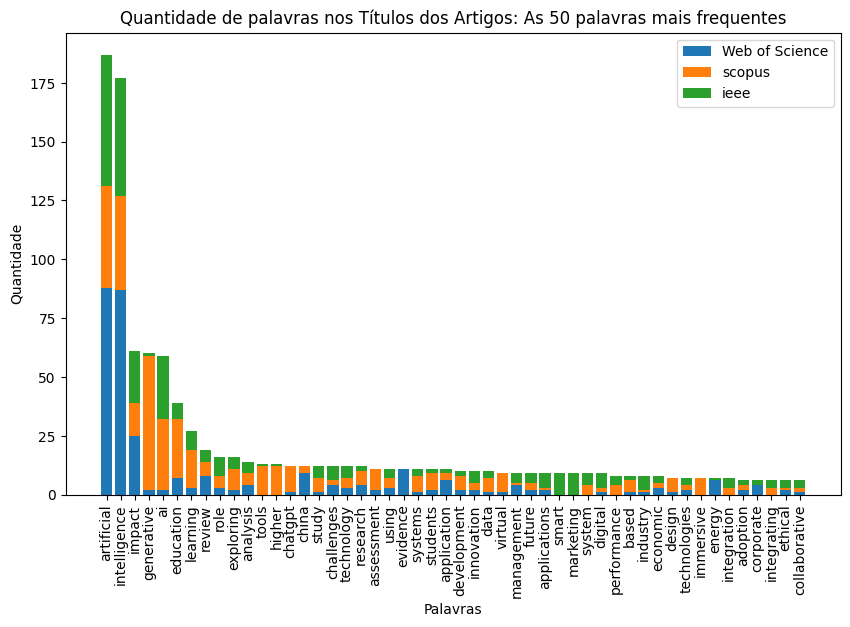

In [42]:
# Plotagem dos totais de cada base
qtd_palavras = 50
figure, ax = plt.subplots(figsize=(10,6))
ax.bar(df_total_titulo['palavras'][:qtd_palavras], df_total_titulo['qtd_wos'][:qtd_palavras], label='Web of Science')
ax.bar(df_total_titulo['palavras'][:qtd_palavras], df_total_titulo['qtd_scopus'][:qtd_palavras],
       bottom=df_total_titulo['qtd_wos'][:qtd_palavras], label='scopus')
ax.bar(df_total_titulo['palavras'][:qtd_palavras], df_total_titulo['qtd_ieee'][:qtd_palavras],
       bottom=df_total_titulo['qtd_wos'][:qtd_palavras]+df_total_titulo['qtd_scopus'][:qtd_palavras], label='ieee')
ax.set_xlabel('Palavras')
ax.set_ylabel('Quantidade')
ax.set_title('Quantidade de palavras nos Títulos dos Artigos: As '+str(qtd_palavras)+' palavras mais frequentes')
ax.legend()
plt.xticks(rotation=90)
plt.show()


Tratando por abstract

In [43]:
df_tratado_abstract = df_tratado['Resumo'].str.lower()
df_tratado_abstract = pd.DataFrame(df_tratado_abstract)
df_tratado_abstract.columns = ['abstract']

df_tratado_abstract['base'] = df_tratado['base']

df_tratado_abstract['abstract'] = df_tratado_abstract['abstract'].str.replace(',', ' ')
df_tratado_abstract['abstract'] = df_tratado_abstract['abstract'].str.replace(';', ' ')
df_tratado_abstract['abstract'] = df_tratado_abstract['abstract'].str.replace('.', ' ')
df_tratado_abstract['abstract'] = df_tratado_abstract['abstract'].str.replace(':', ' ')
df_tratado_abstract['abstract'] = df_tratado_abstract['abstract'].str.replace('?', ' ')
df_tratado_abstract['abstract'] = df_tratado_abstract['abstract'].str.replace('!', ' ')
df_tratado_abstract['abstract'] = df_tratado_abstract['abstract'].str.replace('(', ' ')
df_tratado_abstract['abstract'] = df_tratado_abstract['abstract'].str.replace(')', ' ')
df_tratado_abstract['abstract'] = df_tratado_abstract['abstract'].str.replace('[', ' ')
df_tratado_abstract['abstract'] = df_tratado_abstract['abstract'].str.replace(']', ' ')
df_tratado_abstract['abstract'] = df_tratado_abstract['abstract'].str.replace('{', ' ')
df_tratado_abstract['abstract'] = df_tratado_abstract['abstract'].str.replace('}', ' ')
df_tratado_abstract['abstract'] = df_tratado_abstract['abstract'].str.replace('"', ' ')
df_tratado_abstract['abstract'] = df_tratado_abstract['abstract'].str.replace("'", ' ')
for _ in range(10):
  df_tratado_titulo['Título'] = df_tratado_titulo['Título'].str.replace('  ', ' ')
#removendo os títulos vazios
df_tratado_titulo = df_tratado_titulo[df_tratado_titulo['Título'] != '']
df_tratado_titulo

/tmp/ipykernel_3758/1456028012.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_tratado_abstract['abstract'] = df_tratado_abstract['abstract'].str.replace('.', ' ')
/tmp/ipykernel_3758/1456028012.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_tratado_abstract['abstract'] = df_tratado_abstract['abstract'].str.replace('?', ' ')
/tmp/ipykernel_3758/1456028012.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_tratado_abstract['abstract'] = df_tratado_abstract['abstract'].str.replace('(', ' ')
/tmp/ipyker

,Título,base
0,artificial intelligence strategies and their i...,wos
1,is artificial intelligence disruptive,wos
2,the environmental impact of artificial intelli...,wos
3,the impact of artificial intelligence on langu...,wos
4,the impact of artificial intelligence on corpo...,wos
...,...,...
251,measure the impact of institution and paper vi...,ieee
252,a critical review of applications of artificia...,ieee
253,understanding the societal impacts of artifici...,ieee
254,the impact of total product purchase limit on ...,ieee


In [44]:
df_tratado_abstract_wos = df_tratado_abstract[df_tratado_abstract['base'] == 'wos']
df_tratado_abstract_scopus = df_tratado_abstract[df_tratado_abstract['base'] == 'scopus']
df_tratado_abstract_ieee = df_tratado_abstract[df_tratado_abstract['base'] == 'ieee']

df_tratado_abstract_contagem_palavras_wos = pd.DataFrame(df_tratado_abstract_wos['abstract'].str.split(' ').explode().value_counts())
df_tratado_abstract_contagem_palavras_scopus = pd.DataFrame(df_tratado_abstract_scopus['abstract'].str.split(' ').explode().value_counts())
df_tratado_abstract_contagem_palavras_ieee = pd.DataFrame(df_tratado_abstract_ieee['abstract'].str.split(' ').explode().value_counts())

print('Total de palavras da base Web of Science')
print(df_tratado_abstract_contagem_palavras_wos)

print('\nTotal de palavras da base Scopus')
print(df_tratado_abstract_contagem_palavras_scopus)

print('\nTotal de palavras da base IEEE')
print(df_tratado_abstract_contagem_palavras_ieee)

df_total_abstract = pd.concat([df_tratado_abstract_contagem_palavras_wos, df_tratado_abstract_contagem_palavras_scopus, df_tratado_abstract_contagem_palavras_ieee], axis=1)
df_total_abstract.fillna(0, inplace=True)
df_total_abstract.reset_index(inplace=True)
df_total_abstract.columns = ['palavras', 'qtd_wos', 'qtd_scopus', 'qtd_ieee']
df_total_abstract['total'] = df_total_abstract['qtd_wos'] + df_total_abstract['qtd_scopus'] + df_total_abstract['qtd_ieee']
df_total_abstract.sort_values(by='total', ascending=False, inplace=True)
df_total_abstract = df_total_abstract[~df_total_abstract['palavras'].isin(stop_words)]
#removendo os títulos vazios
df_total_abstract = df_total_abstract[df_total_abstract['palavras'] != '']
df_total_abstract


Total de palavras da base Web of Science
          abstract
              1986
the           1059
and            792
of             758
in             424
...            ...
59%              1
greatest         1
km               1
200              1
thorough         1

[3120 rows x 1 columns]

Total de palavras da base Scopus
           abstract
               1997
the             788
and             705
of              499
in              366
...             ...
little            1
size              1
expanding         1
launched          1
journey           1

[2616 rows x 1 columns]

Total de palavras da base IEEE
            abstract
                1913
the             1064
and              785
of               723
in               398
...              ...
sdg11              1
sdg7               1
microgrids         1
quest              1
aiding             1

[2987 rows x 1 columns]


,palavras,qtd_wos,qtd_scopus,qtd_ieee,total
6,ai,301.0,142.0,335.0,778.0
7,intelligence,235.0,116.0,184.0,535.0
8,artificial,227.0,114.0,175.0,516.0
25,research,64.0,77.0,96.0,237.0
23,study,69.0,69.0,89.0,227.0
...,...,...,...,...,...
3665,tackling,0.0,1.0,0.0,1.0
1908,casp,1.0,0.0,0.0,1.0
1906,appraisal,1.0,0.0,0.0,1.0
1904,ten,1.0,0.0,0.0,1.0


/tmp/ipykernel_3758/765009901.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ax.bar(df_total_abstract['palavras'][:qtd_palavras], df_total_abstract['qtd_wos'][:qtd_palavras], label='Web of Science')
/tmp/ipykernel_3758/765009901.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ax.bar(df_total_abstract['palavras'][:qtd_palavras], df_total_abstract['qtd_scopus'][:qtd_palavras],
/tmp/ipykernel_3758/765009901.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-

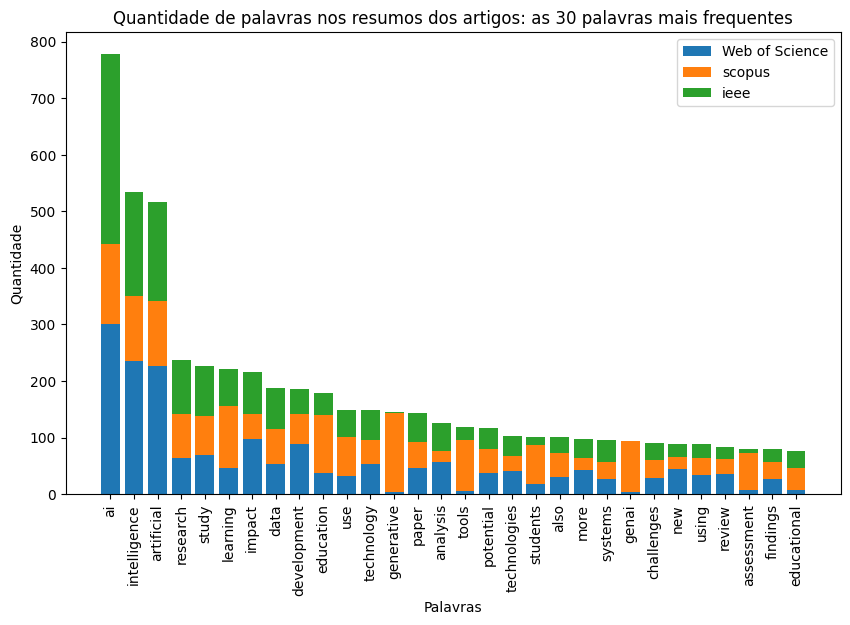

In [45]:
# Visualizando dados
qtd_palavras = 30
figure, ax = plt.subplots(figsize=(10,6))
ax.bar(df_total_abstract['palavras'][:qtd_palavras], df_total_abstract['qtd_wos'][:qtd_palavras], label='Web of Science')
ax.bar(df_total_abstract['palavras'][:qtd_palavras], df_total_abstract['qtd_scopus'][:qtd_palavras],
       bottom=df_total_abstract['qtd_wos'][:qtd_palavras], label='scopus')
ax.bar(df_total_abstract['palavras'][:qtd_palavras], df_total_abstract['qtd_ieee'][:qtd_palavras],
       bottom=df_total_abstract['qtd_wos'][:qtd_palavras]+df_total_abstract['qtd_scopus'][:qtd_palavras], label='ieee')
ax.set_xlabel('Palavras')
ax.set_ylabel('Quantidade')
ax.set_title('Quantidade de palavras nos resumos dos artigos: as '+str(qtd_palavras)+' palavras mais frequentes')
ax.legend()
plt.xticks(rotation=90)
plt.show()

Tratando as keywords

In [46]:
df_tratado_keywords = df_tratado['Palavras-chave'].str.lower()
df_tratado_keywords = pd.DataFrame(df_tratado_keywords)
df_tratado_keywords.columns = ['keywords']

df_tratado_keywords['base'] = df_tratado['base']

df_tratado_keywords['keywords'] = df_tratado_keywords['keywords'].str.replace(',', ' ')
df_tratado_keywords['keywords'] = df_tratado_keywords['keywords'].str.replace(';', ' ')
df_tratado_keywords['keywords'] = df_tratado_keywords['keywords'].str.replace('.', ' ')
df_tratado_keywords['keywords'] = df_tratado_keywords['keywords'].str.replace(':', ' ')
df_tratado_keywords['keywords'] = df_tratado_keywords['keywords'].str.replace('?', ' ')
df_tratado_keywords['keywords'] = df_tratado_keywords['keywords'].str.replace('!', ' ')
df_tratado_keywords['keywords'] = df_tratado_keywords['keywords'].str.replace('(', ' ')
df_tratado_keywords['keywords'] = df_tratado_keywords['keywords'].str.replace(')', ' ')
df_tratado_keywords['keywords'] = df_tratado_keywords['keywords'].str.replace('[', ' ')
df_tratado_keywords['keywords'] = df_tratado_keywords['keywords'].str.replace(']', ' ')
df_tratado_keywords['keywords'] = df_tratado_keywords['keywords'].str.replace('{', ' ')
df_tratado_keywords['keywords'] = df_tratado_keywords['keywords'].str.replace('}', ' ')
df_tratado_keywords['keywords'] = df_tratado_keywords['keywords'].str.replace('"', ' ')
df_tratado_keywords['keywords'] = df_tratado_keywords['keywords'].str.replace("'", ' ')
for _ in range(10):
  df_tratado_keywords['keywords'] = df_tratado_keywords['keywords'].str.replace('  ', ' ')
#removendo keywords vazios
df_tratado_keywords = df_tratado_keywords[df_tratado_keywords['keywords'] != '']
df_tratado_keywords

/tmp/ipykernel_3758/2079155946.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_tratado_keywords['keywords'] = df_tratado_keywords['keywords'].str.replace('.', ' ')
/tmp/ipykernel_3758/2079155946.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_tratado_keywords['keywords'] = df_tratado_keywords['keywords'].str.replace('?', ' ')
/tmp/ipykernel_3758/2079155946.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_tratado_keywords['keywords'] = df_tratado_keywords['keywords'].str.replace('(', ' ')
/tmp/ipyker

,keywords,base
0,artificial intelligence machine learning emerg...,wos
1,artificial intelligence fourth industrial revo...,wos
2,training costs energy efficiency artificial in...,wos
3,reviews artificial intelligence,wos
4,artificial intelligence investment protection ...,wos
...,...,...
251,institution impact paper impact institution-ci...,ieee
252,ai technology financial industry powered techn...,ieee
253,ai employment ethics machine learning policy a...,ieee
254,total product purchase limit perceived scarcit...,ieee


In [47]:
df_tratado_keywords_wos = df_tratado_keywords[df_tratado_keywords['base'] == 'wos']
df_tratado_keywords_scopus = df_tratado_keywords[df_tratado_keywords['base'] == 'scopus']
df_tratado_keywords_ieee = df_tratado_keywords[df_tratado_keywords['base'] == 'ieee']

df_tratado_keywords_contagem_palavras_wos = pd.DataFrame(df_tratado_keywords_wos['keywords'].str.split(' ').explode().value_counts())
df_tratado_keywords_contagem_palavras_scopus = pd.DataFrame(df_tratado_keywords_scopus['keywords'].str.split(' ').explode().value_counts())
df_tratado_keywords_contagem_palavras_ieee = pd.DataFrame(df_tratado_keywords_ieee['keywords'].str.split(' ').explode().value_counts())

print('Total de palavras da base Web of Science')
print(df_tratado_keywords_contagem_palavras_wos)

print('\nTotal de palavras da base Scopus')
print(df_tratado_keywords_contagem_palavras_scopus)

print('\nTotal de palavras da base IEEE')
print(df_tratado_keywords_contagem_palavras_ieee)

df_tratado_keywords = pd.concat([df_tratado_keywords_contagem_palavras_wos, df_tratado_keywords_contagem_palavras_scopus, df_tratado_keywords_contagem_palavras_ieee], axis=1)
df_tratado_keywords.fillna(0, inplace=True)
df_tratado_keywords.reset_index(inplace=True)
df_tratado_keywords.columns = ['palavras', 'qtd_wos', 'qtd_scopus', 'qtd_ieee']
df_tratado_keywords['total'] = df_tratado_keywords['qtd_wos'] + df_tratado_keywords['qtd_scopus'] + df_tratado_keywords['qtd_ieee']
df_tratado_keywords.sort_values(by='total', ascending=False, inplace=True)
df_tratado_keywords = df_tratado_keywords[~df_tratado_keywords['palavras'].isin(stop_words)]
df_tratado_keywords = df_tratado_keywords[df_tratado_keywords['palavras'] != '']
df_tratado_keywords


Total de palavras da base Web of Science
               keywords
artificial           94
intelligence         93
learning             16
ai                   16
education            11
...                 ...
higher                1
students              1
undergraduate         1
motivated             1
graduate              1

[410 rows x 1 columns]

Total de palavras da base Scopus
               keywords
generative           54
intelligence         51
artificial           51
ai                   30
education            27
...                 ...
&                     1
gaussian              1
mixture               1
hidden                1
self-directed         1

[297 rows x 1 columns]

Total de palavras da base IEEE
                         keywords
intelligence                   74
artificial                     73
ai                             42
learning                       28
and                            12
...                           ...
behaviour                      

,palavras,qtd_wos,qtd_scopus,qtd_ieee,total
0,artificial,94.0,51.0,73.0,218.0
1,intelligence,93.0,51.0,74.0,218.0
3,ai,16.0,30.0,42.0,88.0
2,learning,16.0,16.0,28.0,60.0
73,generative,2.0,54.0,0.0,56.0
...,...,...,...,...,...
382,retina,1.0,0.0,0.0,1.0
381,flipped,1.0,0.0,0.0,1.0
380,aige,1.0,0.0,0.0,1.0
379,rural,1.0,0.0,0.0,1.0


/tmp/ipykernel_3758/3955603110.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ax.bar(df_tratado_keywords['palavras'][:qtd_palavras], df_tratado_keywords['qtd_wos'][:qtd_palavras], label='Web of Science')
/tmp/ipykernel_3758/3955603110.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ax.bar(df_tratado_keywords['palavras'][:qtd_palavras], df_tratado_keywords['qtd_scopus'][:qtd_palavras],
/tmp/ipykernel_3758/3955603110.py:6: FutureWarning: The behavior of `series[i:j]` with 

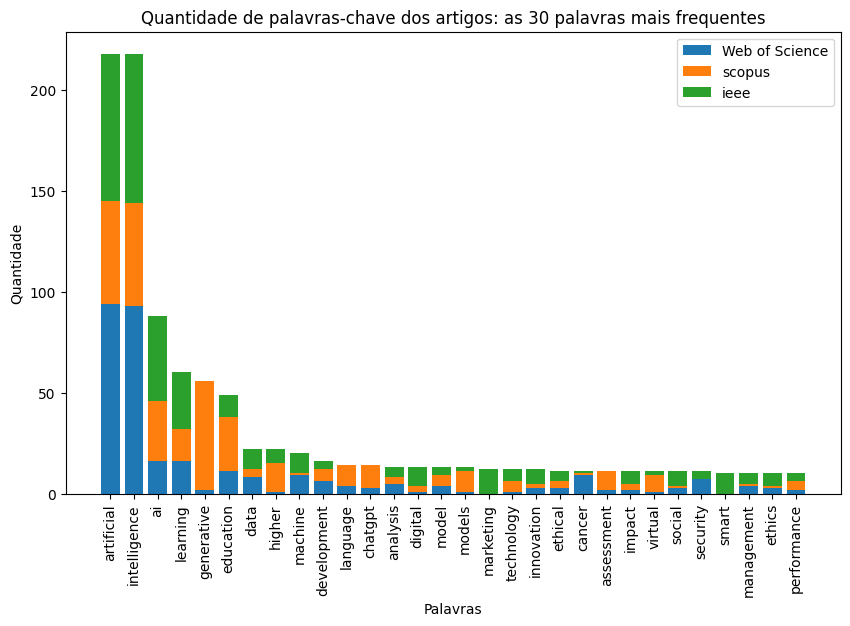

In [48]:
# visualização dos dados
qtd_palavras = 30
figure, ax = plt.subplots(figsize=(10,6))
ax.bar(df_tratado_keywords['palavras'][:qtd_palavras], df_tratado_keywords['qtd_wos'][:qtd_palavras], label='Web of Science')
ax.bar(df_tratado_keywords['palavras'][:qtd_palavras], df_tratado_keywords['qtd_scopus'][:qtd_palavras],
        bottom=df_tratado_keywords['qtd_wos'][:qtd_palavras], label='scopus')
ax.bar(df_tratado_keywords['palavras'][:qtd_palavras], df_tratado_keywords['qtd_ieee'][:qtd_palavras],
        bottom=df_tratado_keywords['qtd_wos'][:qtd_palavras]+df_tratado_keywords['qtd_scopus'][:qtd_palavras], label='ieee')
ax.set_xlabel('Palavras')
ax.set_ylabel('Quantidade')
ax.set_title('Quantidade de palavras-chave dos artigos: as '+str(qtd_palavras)+' palavras mais frequentes')
ax.legend()
plt.xticks(rotation=90)
plt.show()

Totalizando a quantidade de palavras

In [49]:
df_total_palavras = pd.concat([df_total_titulo, df_total_abstract, df_tratado_keywords], axis=0)
df_total_palavras = df_total_palavras[['palavras', 'total']]
df_total_palavras = df_total_palavras.groupby('palavras').sum()
df_total_palavras.fillna(0, inplace=True)
df_total_palavras.reset_index(inplace=True)
df_total_palavras.sort_values(by='total', ascending=False, inplace=True)
df_total_palavras = df_total_palavras[~df_total_palavras['palavras'].isin(stop_words)]
df_total_palavras = df_total_palavras[df_total_palavras['palavras'] != '']
df_total_palavras['total'] = df_total_palavras['total'].astype(int)
df_total_palavras


,palavras,total
2728,intelligence,930
373,ai,925
552,artificial,921
2936,learning,308
2548,impact,288
...,...,...
2578,inaccuracy,1
2579,inaccurate,1
2580,inappropriate,1
2582,incentives,1


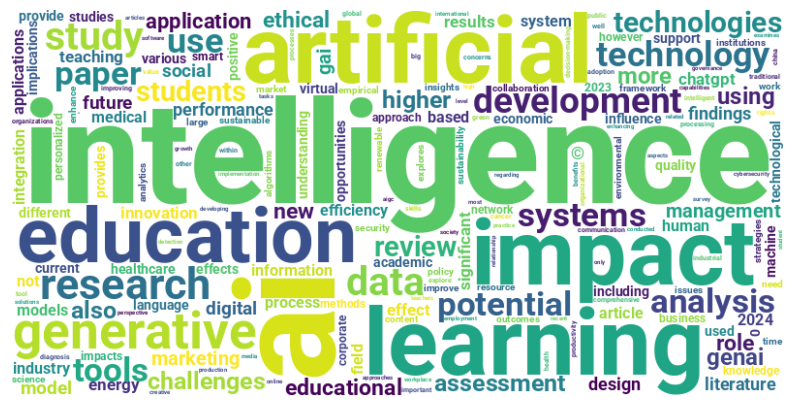

In [54]:
#Criando um gráfico de núvem de palavras
# Convertendo o DataFrame em um dicionário {palavra: frequência}
frequencias = dict(zip(df_total_palavras['palavras'], df_total_titulo['total']))

# Gerando a nuvem de palavras
nuvem_palavras = WordCloud(font_path = "Roboto-Bold.ttf", width=800, height=400, background_color='white').generate_from_frequencies(frequencias)

#test_frequencias = {"Python": 10, "Data": 5, "AI": 8}
#nuvem_palavras = WordCloud(font_path="/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf").generate_from_frequencies(test_frequencias)
#plotando o gráfico
plt.figure(figsize=(10,6))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()